In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\Bank_customers_data.csv")


In [3]:
df.head()

,Unnamed: 0,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95


- By observing Dataset output column is loan_eligibility

In [4]:
df.shape

(4014, 13)

In [5]:
df.size

52182

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4014 non-null   int64  
 1   Customer ID         4014 non-null   int64  
 2   Name                4014 non-null   object 
 3   Surname             4014 non-null   object 
 4   Gender              4014 non-null   object 
 5   Age                 4014 non-null   int64  
 6   Region              4014 non-null   object 
 7   Job Classification  4014 non-null   object 
 8   Date Joined         4014 non-null   object 
 9   Balance             4014 non-null   float64
 10  loan                4014 non-null   float64
 11  score               4014 non-null   float64
 12  loan_eligibility    4014 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 407.8+ KB


In [7]:
df.describe()

,Unnamed: 0,Customer ID,Age,Balance,loan,score,loan_eligibility
count,4014.000000,4.014000e+03,4014.000000,4014.000000,4014.000000,4014.000000,4.014000e+03
mean,2006.500000,1.696831e+08,38.611111,39766.448274,5557.883159,501.068012,2.100837e+05
std,1158.886319,8.865374e+07,9.819121,29859.489192,2582.640099,113.666117,3.677718e+05
min,0.000000,1.000000e+08,15.000000,11.520000,1000.000000,300.000000,0.000000e+00
25%,1003.250000,1.000020e+08,31.000000,16115.367500,3366.000000,404.000000,0.000000e+00
50%,2006.500000,1.000038e+08,37.000000,33567.330000,5566.500000,502.000000,3.040905e+04
75%,3009.750000,2.000031e+08,45.000000,57533.930000,7768.750000,596.750000,2.787510e+05
max,4013.000000,4.000038e+08,64.000000,183467.700000,9996.000000,700.000000,3.633620e+06


In [8]:
df.describe(include='object')

,Name,Surname,Gender,Region,Job Classification,Date Joined
count,4014,4014,4014,4014,4014,4014
unique,172,150,2,4,3,307
top,Jason,Kerr,Male,England,White Collar,24.Sep.15
freq,42,41,2165,2159,1955,67


In [9]:
df.isnull().sum()

Unnamed: 0            0
Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
loan                  0
score                 0
loan_eligibility      0
dtype: int64

In [10]:
df.duplicated().value_counts()

False    4014
Name: count, dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='loan_eligibility'>

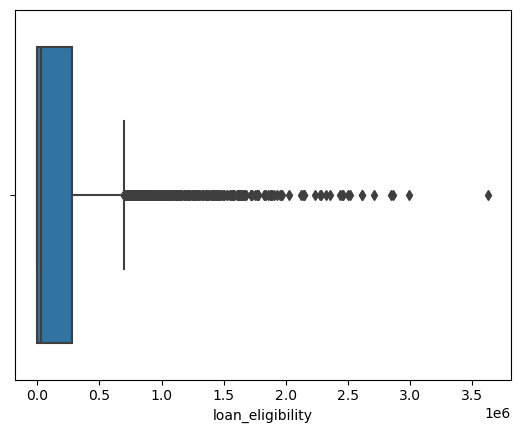

In [12]:
sns.boxplot(x='loan_eligibility',data=df)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_eligibility', ylabel='Count'>

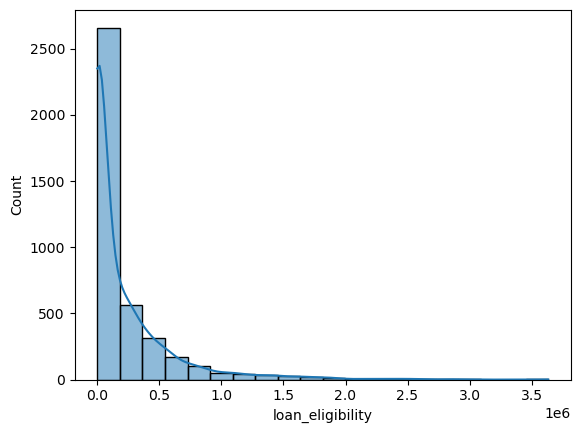

In [13]:
sns.histplot(x='loan_eligibility',data=df,kde = True,bins=20)

- Here it is right skewed. So, i will do log transformation to solve this issue

C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_eligibility', ylabel='Count'>

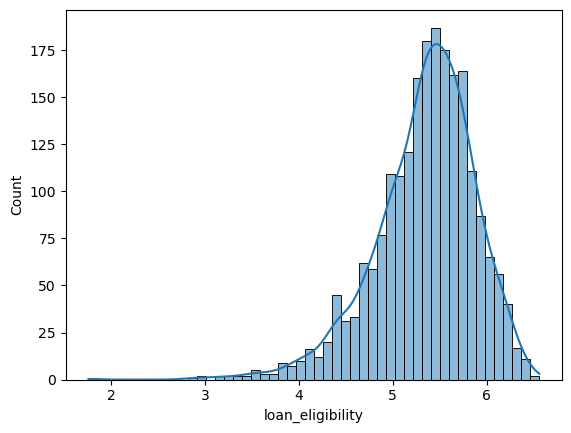

In [14]:
sns.histplot(np.log10(df['loan_eligibility']),kde=True,fill=True,bins=50)

In [15]:
# df['Date Joined'].value_counts()

- The Date Joined column is not is standard format. So, we need to change it into standard form

In [16]:
# import pandas as pd

# data = df['Date Joined']
# df1 = pd.DataFrame(data)

# # Convert datetime objects to standard date format
# df['Date Joined'] = pd.to_datetime(df['Date Joined']).dt.strftime('%Y-%m-%d')

# # Print the DataFrame with updated date format
# print(df1)


- Date Joined column values are changed to standard date format

In [17]:
# df.head()

In [18]:
# df = df.copy()

# df['Date Joined'] = pd.to_datetime(df['Date Joined'])
# df.loc[:, 'Year'] = df['Date Joined'].dt.year
# df.loc[:, 'Month'] = df['Date Joined'].dt.month
# df.loc[:, 'Day'] = df['Date Joined'].dt.day

- I have created seperate Day, Month and Year columns. 

In [19]:
# df

In [20]:
# Assuming df is your DataFrame
# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                  Unnamed: 0  Customer ID       Age   Balance      loan  \
Unnamed: 0          1.000000    -0.093208  0.009184  0.006303 -0.018632   
Customer ID        -0.093208     1.000000  0.081691  0.021428  0.005928   
Age                 0.009184     0.081691  1.000000  0.009359  0.001350   
Balance             0.006303     0.021428  0.009359  1.000000  0.038787   
loan               -0.018632     0.005928  0.001350  0.038787  1.000000   
score               0.003743     0.015504 -0.014959 -0.001151 -0.028720   
loan_eligibility    0.024500    -0.449097 -0.217723  0.433671 -0.002953   

                     score  loan_eligibility  
Unnamed: 0        0.003743          0.024500  
Customer ID       0.015504         -0.449097  
Age              -0.014959         -0.217723  
Balance          -0.001151          0.433671  
loan             -0.028720         -0.002953  
score             1.000000          0.299763  
loan_eligibility  0.299763          1.000000  


In [21]:
df= df.drop(columns=['Unnamed: 0','Customer ID','Name','Surname','Date Joined','Gender','Region','Job Classification'])

In [22]:
df.head()

,Age,Balance,loan,score,loan_eligibility
0,21,113810.15,5252.0,644.0,2276203.00
1,34,36919.73,8907.0,697.0,0.00
2,46,101536.83,2162.0,617.0,2030736.60
3,32,1421.52,7277.0,672.0,0.00
4,38,35639.79,2586.0,405.0,178198.95


In [23]:
df.isnull().sum()

Age                 0
Balance             0
loan                0
score               0
loan_eligibility    0
dtype: int64

In [24]:
# categorical_columns=['Gender','Region','Job Classification']
# df_encoded=pd.get_dummies(data=df  ,prefix='OHE',prefix_sep='_',columns=categorical_columns,drop_first=True,dtype='int8')

- Some columns are categorical, so i have done one hot encoding to convert categorical to numerical.

In [25]:
# df_encoded

In [26]:
X = df.drop(columns=['loan_eligibility'],axis=1)
y = df['loan_eligibility']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [28]:
scaler1 = StandardScaler()

X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)



In [29]:
X_train

array([[ 0.45269449, -0.01167294, -0.68669417, -1.71393982],
       [ 1.1689058 , -1.28428678, -0.12382981,  0.20115074],
       [-0.16120092,  1.72967358, -1.57558924, -1.27469886],
       ...,
       [-0.16120092,  1.46004401, -1.37451133,  1.10598711],
       [-0.46814862, -0.7589618 ,  1.21412644,  1.47494951],
       [-1.38899173, -1.27297653, -0.94006002, -0.19416611]])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.1, max_depth=3)


gb_model.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred1 = gb_model.predict(X_train)
y_pred2 = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 298857.1355020067


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred2)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred2)
r2_score1 = r2_score(y_train, y_pred1)
r2_score2 = r2_score(y_test, y_pred2)


print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)
print("R-squared train:", r2_score1)
print("R-squared test:", r2_score2)

Mean Squared Error : 89315587440.46478
Root Mean Squared Error : 298857.1355020067
Mean Absolute Error : 175000.71010181148
R-squared train: 0.999852862299348
R-squared test: 0.33489398744744814


In [41]:
!pip install pickle5

     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/1

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\pickle5
  copying pickle5\pickle.py -> build\lib.win-amd64-cpython-311\pickle5
  copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-311\pickle5
  copying pickle5\__init__.py -> build\lib.win-amd64-cpython-311\pickle5
  creating build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-311\pickle5\test
  running build_ext
  building 'pickle5._pickle' extension
  error: Mi

In [42]:
import pickle

In [52]:
f1=open("G:\\Data Science\\gb_model_13apri24.sav","wb")

In [53]:
pickle.dump(gb_model,f1)

In [54]:
f1.close()

In [55]:
X_test.head()

,Age,Balance,loan,score
3879,21,18508.11,5165.0,380.0
2319,27,54644.32,7229.0,329.0
2717,28,62077.51,3783.0,347.0
1288,43,68113.06,7774.0,466.0
3143,41,8176.98,8714.0,659.0


In [56]:
X_test.to_csv("G:\\Data Science\\gb_model_13apri24_xtest.csv")

- The training-set accuracy score is 0.99 while the test-set accuracy to be 0.98. These two values are quite comparable. So, this is the best model.